In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### N with Nhat

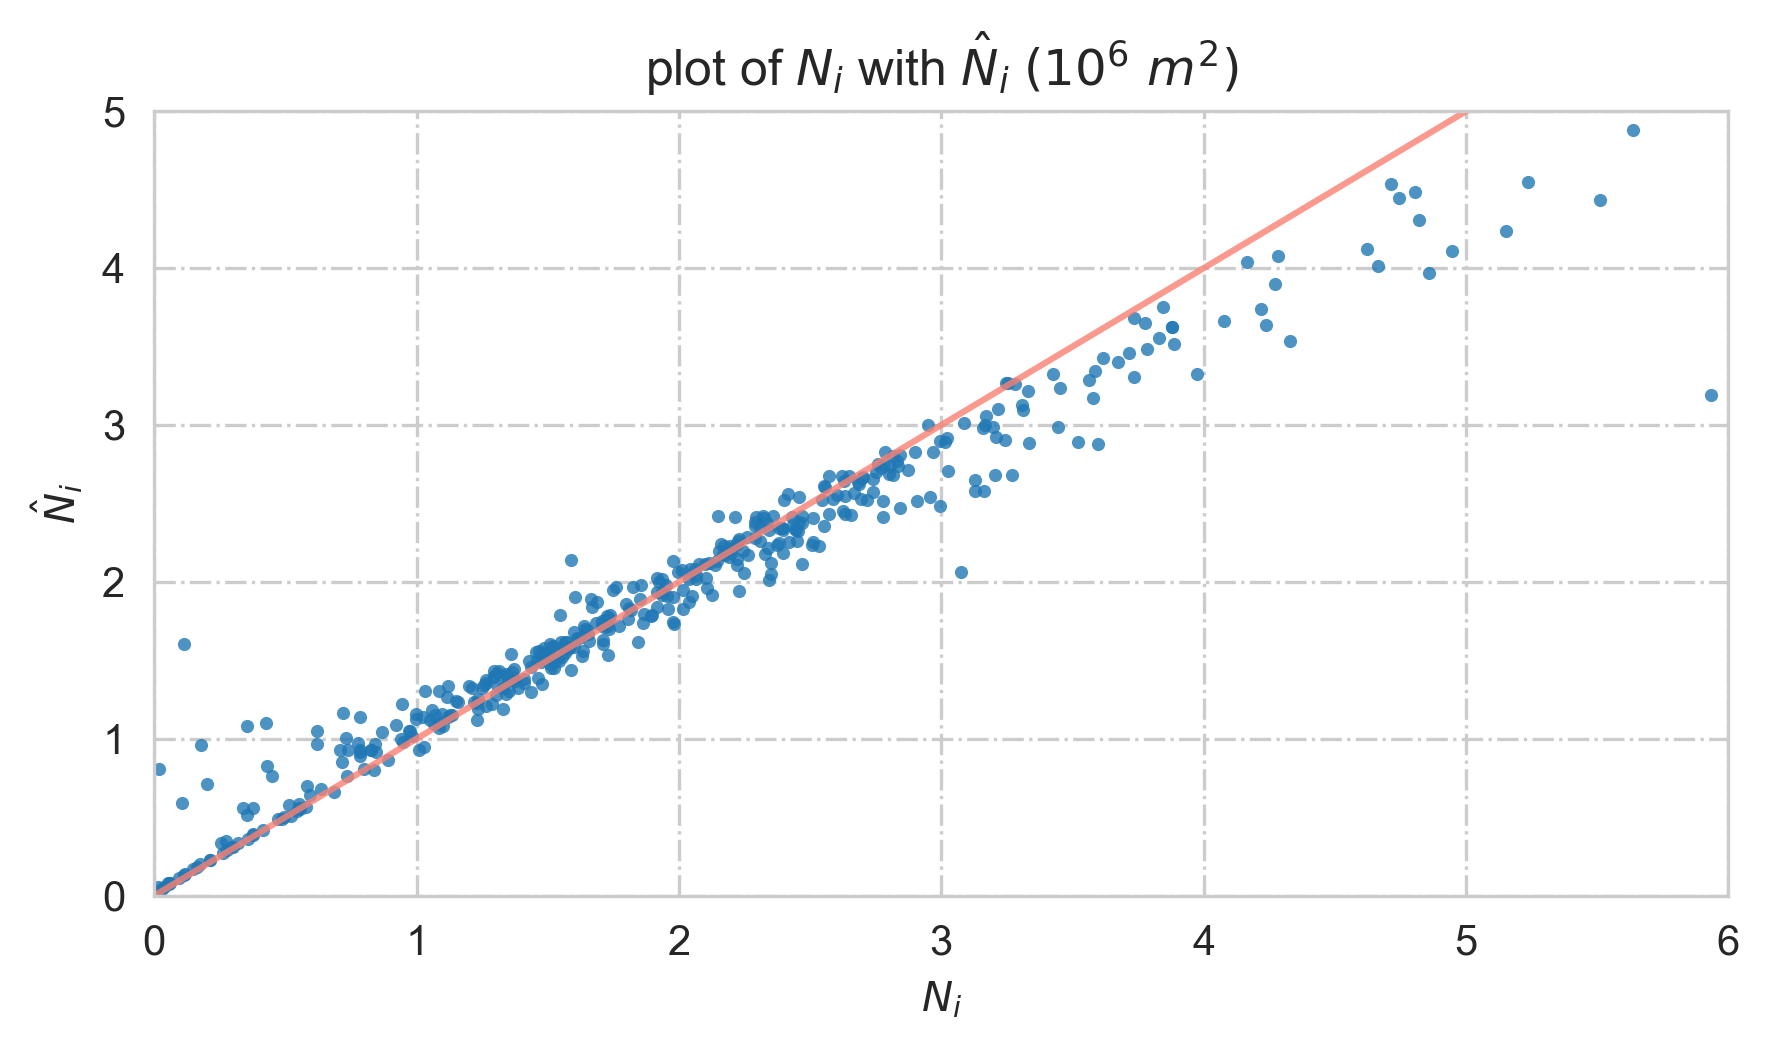

In [2]:
path = 'N_Nhat.csv'
N_Nhat = pd.read_csv(path)
x = N_Nhat['N'].values
y = N_Nhat['Nhat'].values

plt.figure(dpi=300, figsize=(6, 3.6))
plt.scatter(x, y, s = 10, alpha=.8, linewidths=0)
plt.plot([0,7], [0,7], color="salmon", alpha=.8)
plt.xlim([0,6])
plt.ylim([0,5])
plt.title(r'plot of $N_i$ with '+ r'${\hat N}_i$ ' + r'$(10^6\ {m}^2)$')
plt.xlabel(r'$N_i$')  # x轴标题
plt.ylabel(r'${\hat N}_i$')  # y轴标题
plt.grid(True, ls='-.')  # 绘制背景线
plt.tight_layout()
plt.savefig('fig/Nhat with N.png')
plt.show()

##### Nhat_sum with sample rate

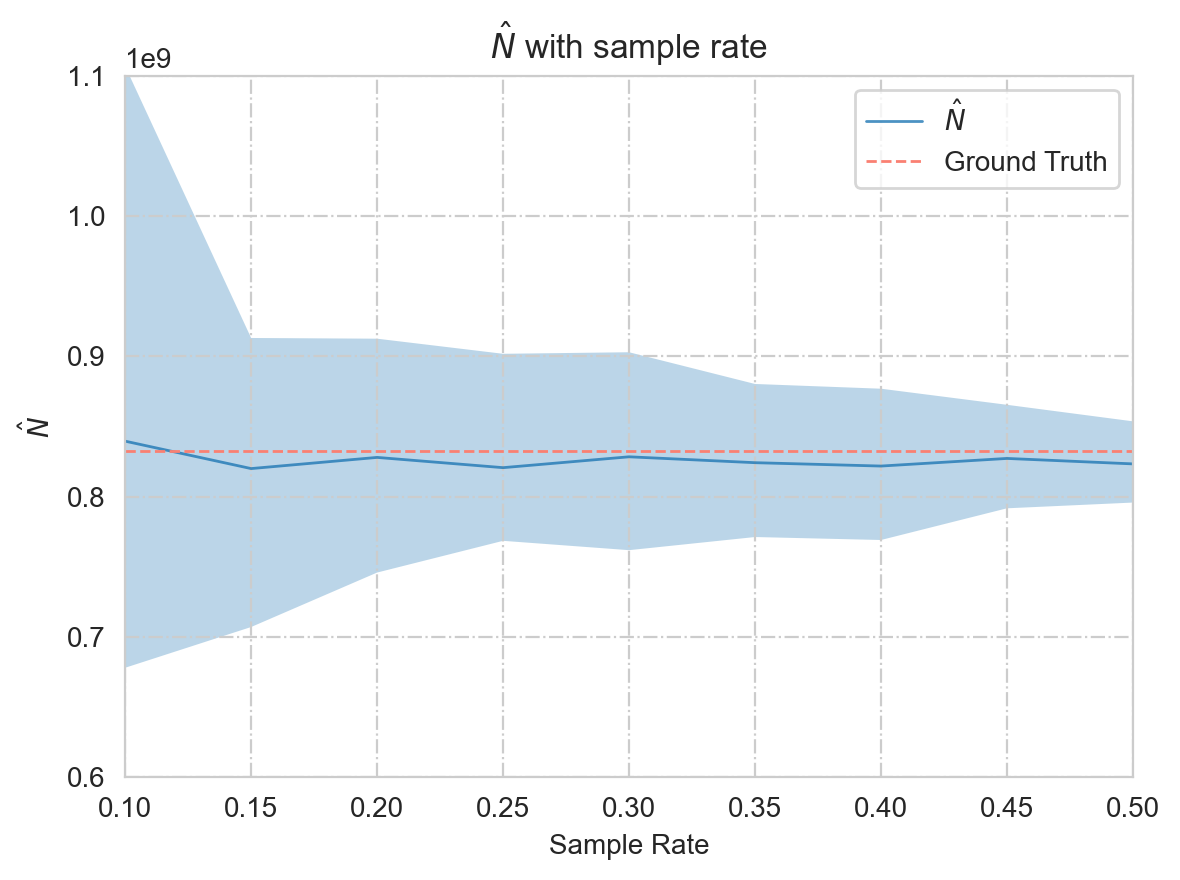

In [4]:
N_sum_real = 832533410.96
path = 'Nhat_samplerate_50_00505.csv'
Nhat_samplerate = pd.read_csv(path)

plt.figure(dpi=200, figsize=(6, 4.5))
plt.fill_between(Nhat_samplerate['sample_rate'].values, Nhat_samplerate['sum_N_upper'].values, Nhat_samplerate['sum_N_lower'].values, alpha=.3, linewidth=0, zorder=0)
plt.hlines(N_sum_real, Nhat_samplerate['sample_rate'][1], Nhat_samplerate['sample_rate'][9], color='salmon', lw=1, label='Ground Truth', zorder=2, ls='--')
plt.plot(Nhat_samplerate['sample_rate'].values, Nhat_samplerate['sum_N_hat'].values, linewidth=1, label=r'$\hat{N}$', zorder=1, alpha=.8)

plt.xlim([Nhat_samplerate['sample_rate'][1],0.5])
plt.ylim([6e8,11e8])
plt.title(r'$\hat{N}$'+ ' with sample rate')
plt.xlabel('Sample Rate')  # x轴标题
plt.ylabel(r'$\hat{N}$')  # y轴标题
plt.grid(True, ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('fig/Nhat with sample rate.png',transparent = True)
plt.show()

##### Nhat with village number

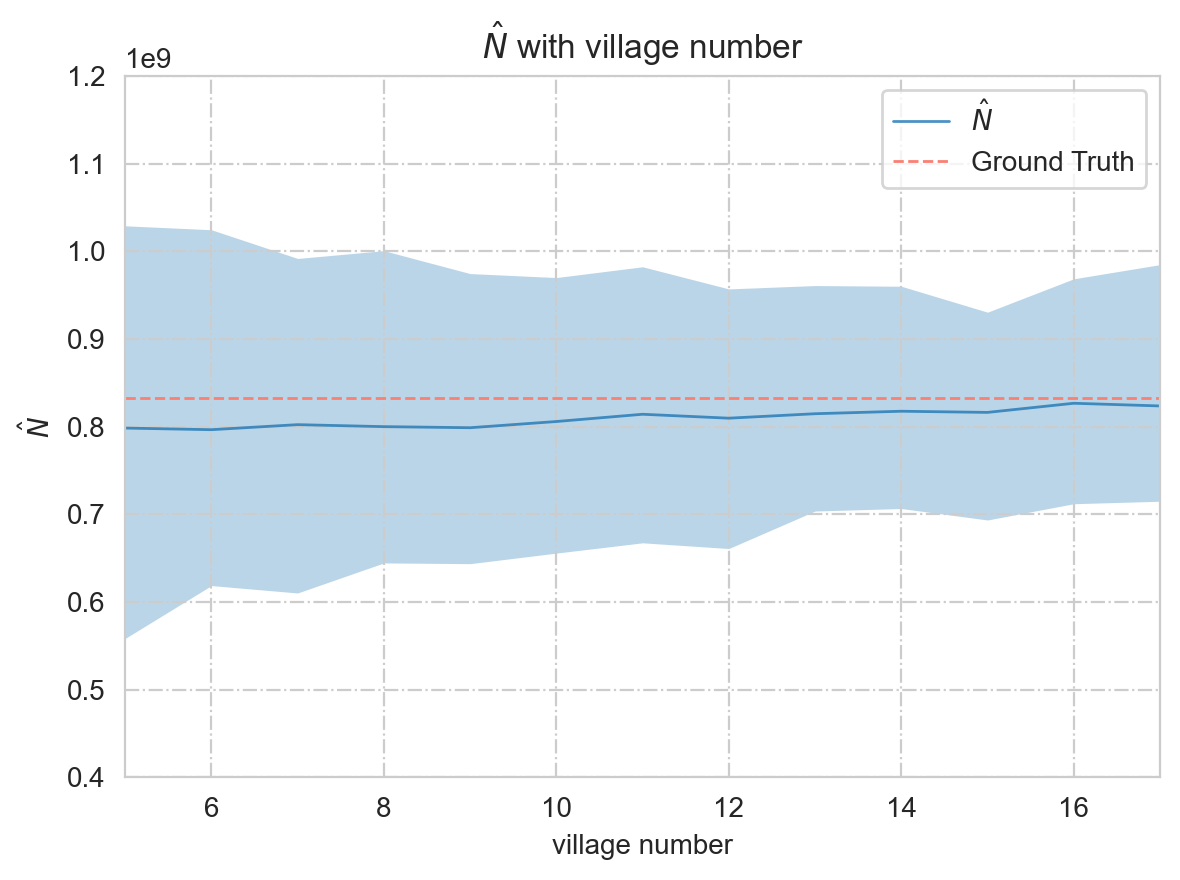

In [5]:
N_sum_real = 832533410.96
path = 'Nhat_villnum_015_200.csv'
Nhat_villnum = pd.read_csv(path)

# fig, ax = plt.subplots()
x = Nhat_villnum['num_town_samp'].values
yu = Nhat_villnum['b_sum_N_upper'].values
yl = Nhat_villnum['b_sum_N_lower'].values
yh = Nhat_villnum['b_sum_N_hat'].values

plt.figure(dpi=200, figsize=(6, 4.5))
plt.fill_between(x, yu, yl, alpha=.3, lw=0, zorder=0)
plt.hlines(N_sum_real, x[0], x[-1], color='salmon', lw=1, label='Ground Truth', zorder=2, ls='--')
plt.plot(x, yh, lw=1, label=r'$\hat{N}$', zorder=1, alpha=.8)

plt.xlim([x[0], x[-1]])
plt.ylim([4e8,12e8])
plt.title(r'$\hat{N}$'+ ' with village number')
plt.xlabel('village number')  # x轴标题
plt.ylabel(r'$\hat{N}$')  # y轴标题
plt.grid(True, ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('fig/Nhat with village number.png')
plt.show()

##### 参数收敛过程

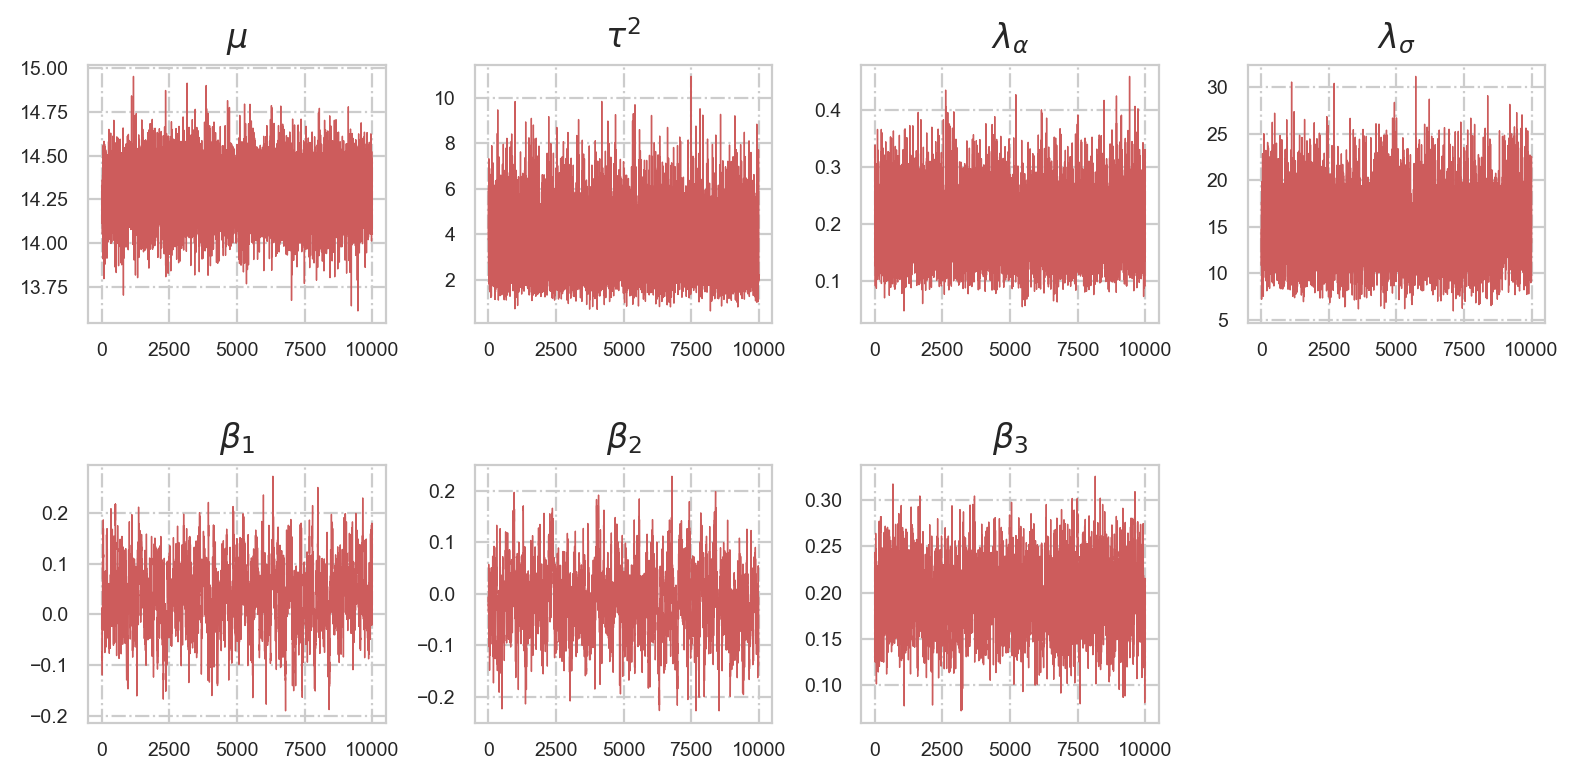

In [7]:
path = 'para.csv'
para = pd.read_csv(path).values
paralist = [r'$\mu$', r'${\tau}^2$', r'${\lambda}_{\alpha}$', r'${\lambda}_{\sigma}$', r'$\beta_1$', r'$\beta_2$', r'$\beta_3$']
x = np.linspace(start=1,stop=10000,num=10000)


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(8, 4), dpi=200)
for i in range(2):
    for j in range(4):
        if i!= 1 or j!=3:
            axs[i, j].set_title(paralist[4*i+j])
            axs[i, j].plot(x, para[:,4*i+j+1], color='indianred', lw=0.5)
            axs[i, j].grid(True, ls='-.')
            axs[i, j].tick_params(labelsize=7)
        # axs[i, j].set_xlabel("Loops")
        # axs[i, j].set_ylabel("value")


fig.delaxes(axs[-1][-1])
# fig.suptitle('Parameters in the 10000 loops', fontsize=16)
fig.tight_layout()
plt.subplots_adjust(wspace=0.3,hspace=0.55)

plt.savefig('fig/parameters in the 10000 loops.png')
plt.show()

##### 计算不同层级 $\alpha$ 的分布

In [ ]:
# import seaborn as sb
# def normfun(x, mu, sigma):
#     pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
#     return pdf
# 
# path = 'summaries.csv'
# summaries = pd.read_csv(path).values
# 
# x = np.linspace(start=11,stop=17,num=1000)
# yc = normfun(x, summaries[0,2], 1/np.sqrt(summaries[1,2]))
# yt1 = normfun(x, summaries[3,2], 1/np.sqrt(summaries[21,2]))
# yt4 = normfun(x, summaries[7,2], 1/np.sqrt(summaries[25,2]))
# yt8 = normfun(x, summaries[12,2], 1/np.sqrt(summaries[30,2]))
# 
# plt.figure(dpi=200, figsize=(6, 4.5))
# 
# plt.plot(x, yt1, lw=1, label=r'$\mu_{3}$', zorder=1, color='darkorange', ls='--')
# plt.plot(x, yt4, lw=1, label=r'$\mu_{7}$', zorder=1, color='steelblue', ls='--')
# plt.plot(x, yt8, lw=1, label=r'$\mu_{12}$', zorder=1, color='limegreen', ls='--')
# plt.plot(x, yc, lw=1.5, label=r'$\mu$', zorder=1, color='firebrick')
# 
# plt.title('Density of ' + r'$\mu$' + ' and ' + r'$\mu_{t}$')
# plt.xlabel(r'$\alpha$')  # x轴标题
# plt.ylabel('Density')  # y轴标题
# plt.grid(True, ls='-.')  # 绘制背景线
# plt.legend(loc='best')
# plt.tight_layout()
# plt.savefig('fig/density of alpha')
# plt.show()

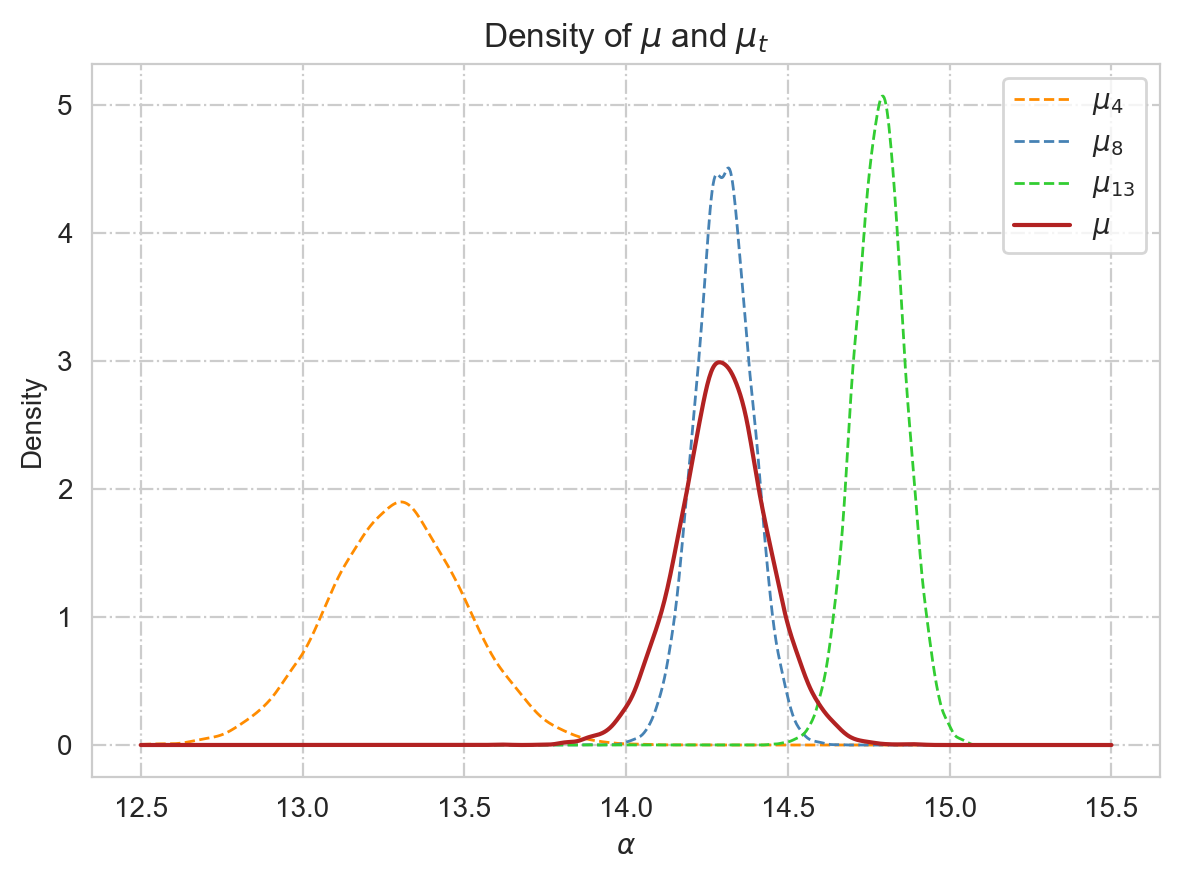

In [11]:
# 使用核密度估计来画后验样本的分布
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
# 生成一组随机数据
path = 'para.csv'
summaries = pd.read_csv(path).values
# 使用高斯核密度估计函数估计数据的概率密度函数
kde0 = gaussian_kde(summaries[:,1])
kde3 = gaussian_kde(summaries[:,4])
kde7 = gaussian_kde(summaries[:,8])
kde12 = gaussian_kde(summaries[:,13])
#生成一组在数据范围内的点
x = np.linspace(start=12.5,stop=15.5,num=1000)

plt.figure(dpi=200, figsize=(6, 4.5))
#计算每个点的概率密度值
yt4= kde3.pdf(x)
yt8= kde7.pdf(x)
yt13= kde12.pdf(x)
yc= kde0.pdf(x)
# 绘制高斯核密度估计图
plt.plot(x, yt4, lw=1, label=r'$\mu_{4}$', zorder=1, color='darkorange', ls='--')
plt.plot(x, yt8, lw=1, label=r'$\mu_{8}$', zorder=1, color='steelblue', ls='--')
plt.plot(x, yt13, lw=1, label=r'$\mu_{13}$', zorder=1, color='limegreen', ls='--')
plt.plot(x, yc, lw=1.5, label=r'$\mu$', zorder=1, color='firebrick')

plt.title('Density of ' + r'$\mu$' + ' and ' + r'$\mu_{t}$')
plt.xlabel(r'$\alpha$')  # x轴标题
plt.ylabel('Density')  # y轴标题
plt.grid(True, ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('fig/density of alpha')
plt.show()